## Import libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset

In [101]:
# load data in dataframe
df = pd.read_csv('C:/Users/gobin/Downloads/diabetes.csv')

### 1st five rows:

In [102]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


### Last five rows:

In [103]:
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.90,0.17,63,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1
767,1,93,70,31,0,30.40,0.32,23,0


### Total no. of rows and columns:

In [104]:
print('Number of instances(rows):', df.shape[0])
print('Number of features(attributes):', df.shape[1])

Number of instances(rows): 768
Number of features(attributes): 9


### Datatypes:

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### To check Null values:

In [106]:
# Missing/Null Value
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [107]:
# Missing/Null Value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Pairplot:

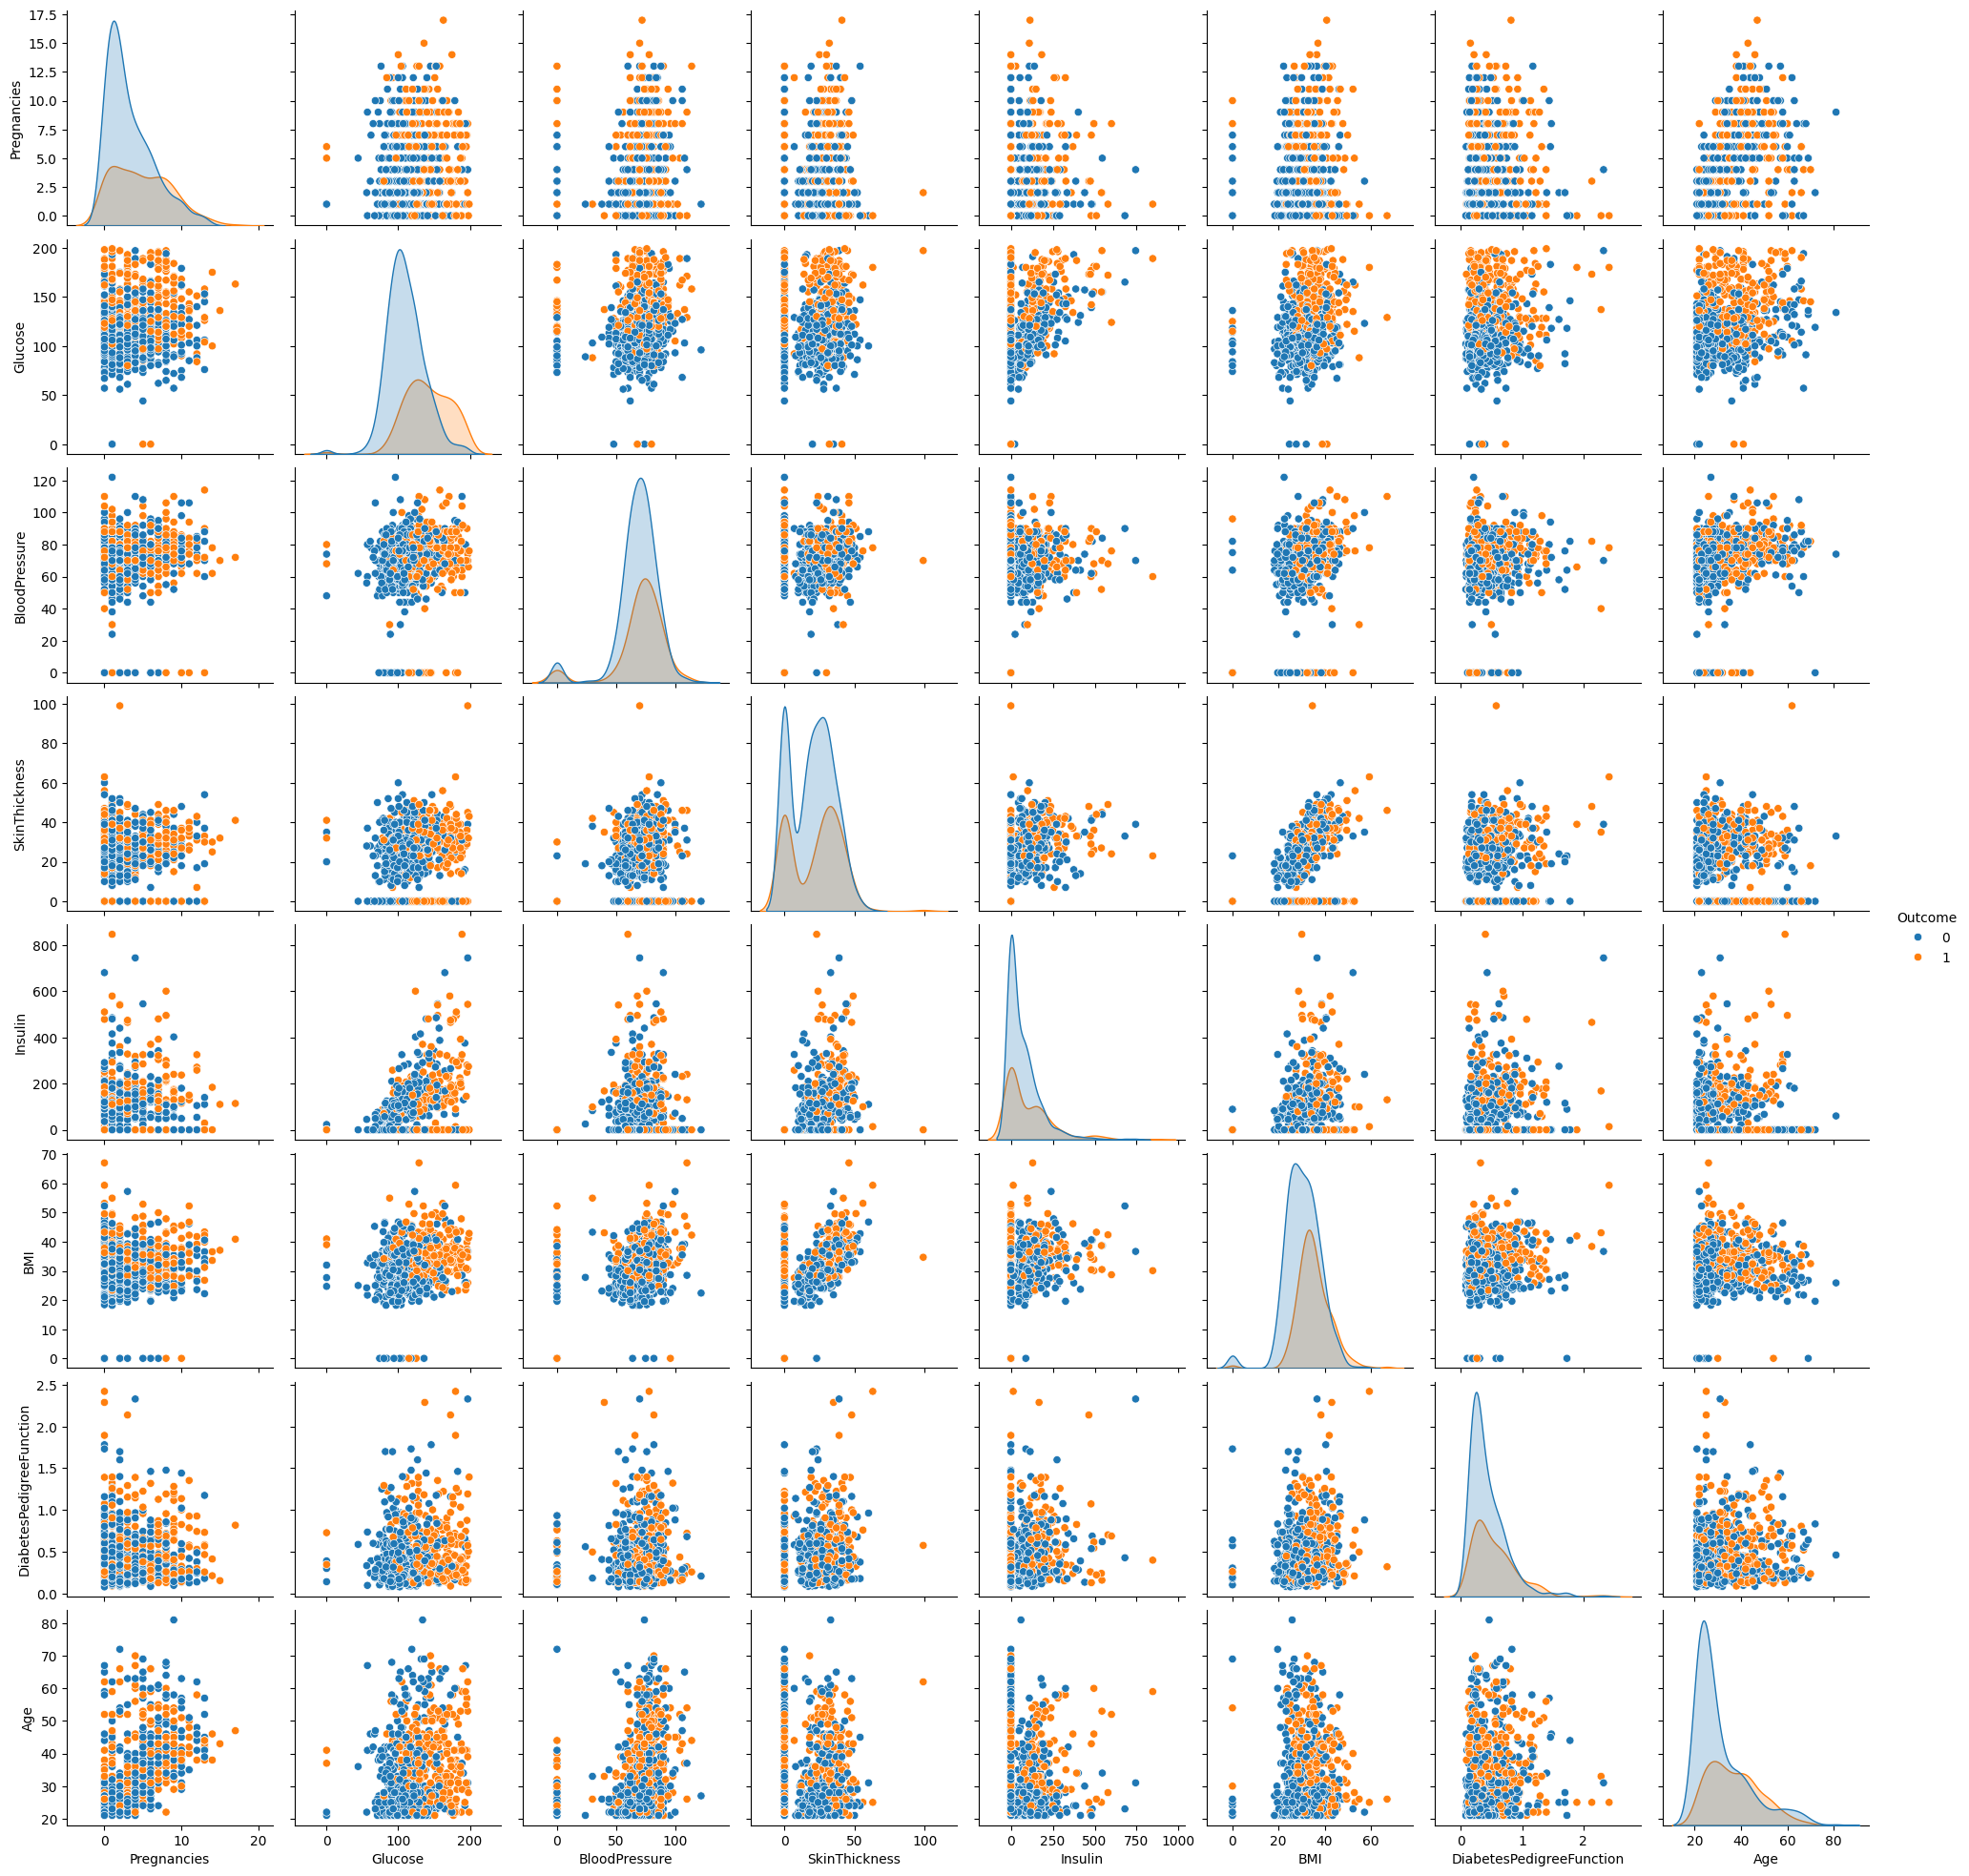

In [108]:
sns.pairplot(df,hue='Outcome')
plt.show()

### Correlation: 

In [109]:
correlation=df.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


### Heatmap:

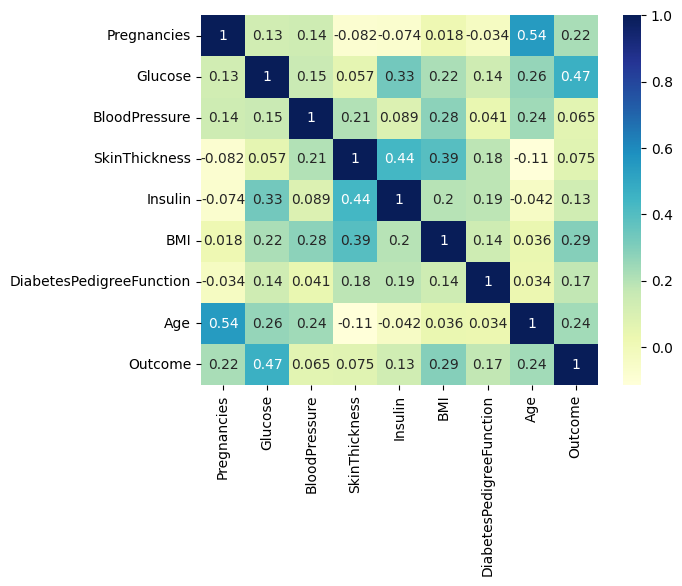

In [110]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) 
plt.show() 

In [111]:
new_df_copy = df.copy(deep = True) 
new_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = new_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0,np.NaN)

Since, we have Null value as 0, this threatens our authenticity of the dataset. Hence, we will first replace the 0 value with the NAN value, then start the imputation process.

In [112]:
new_df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

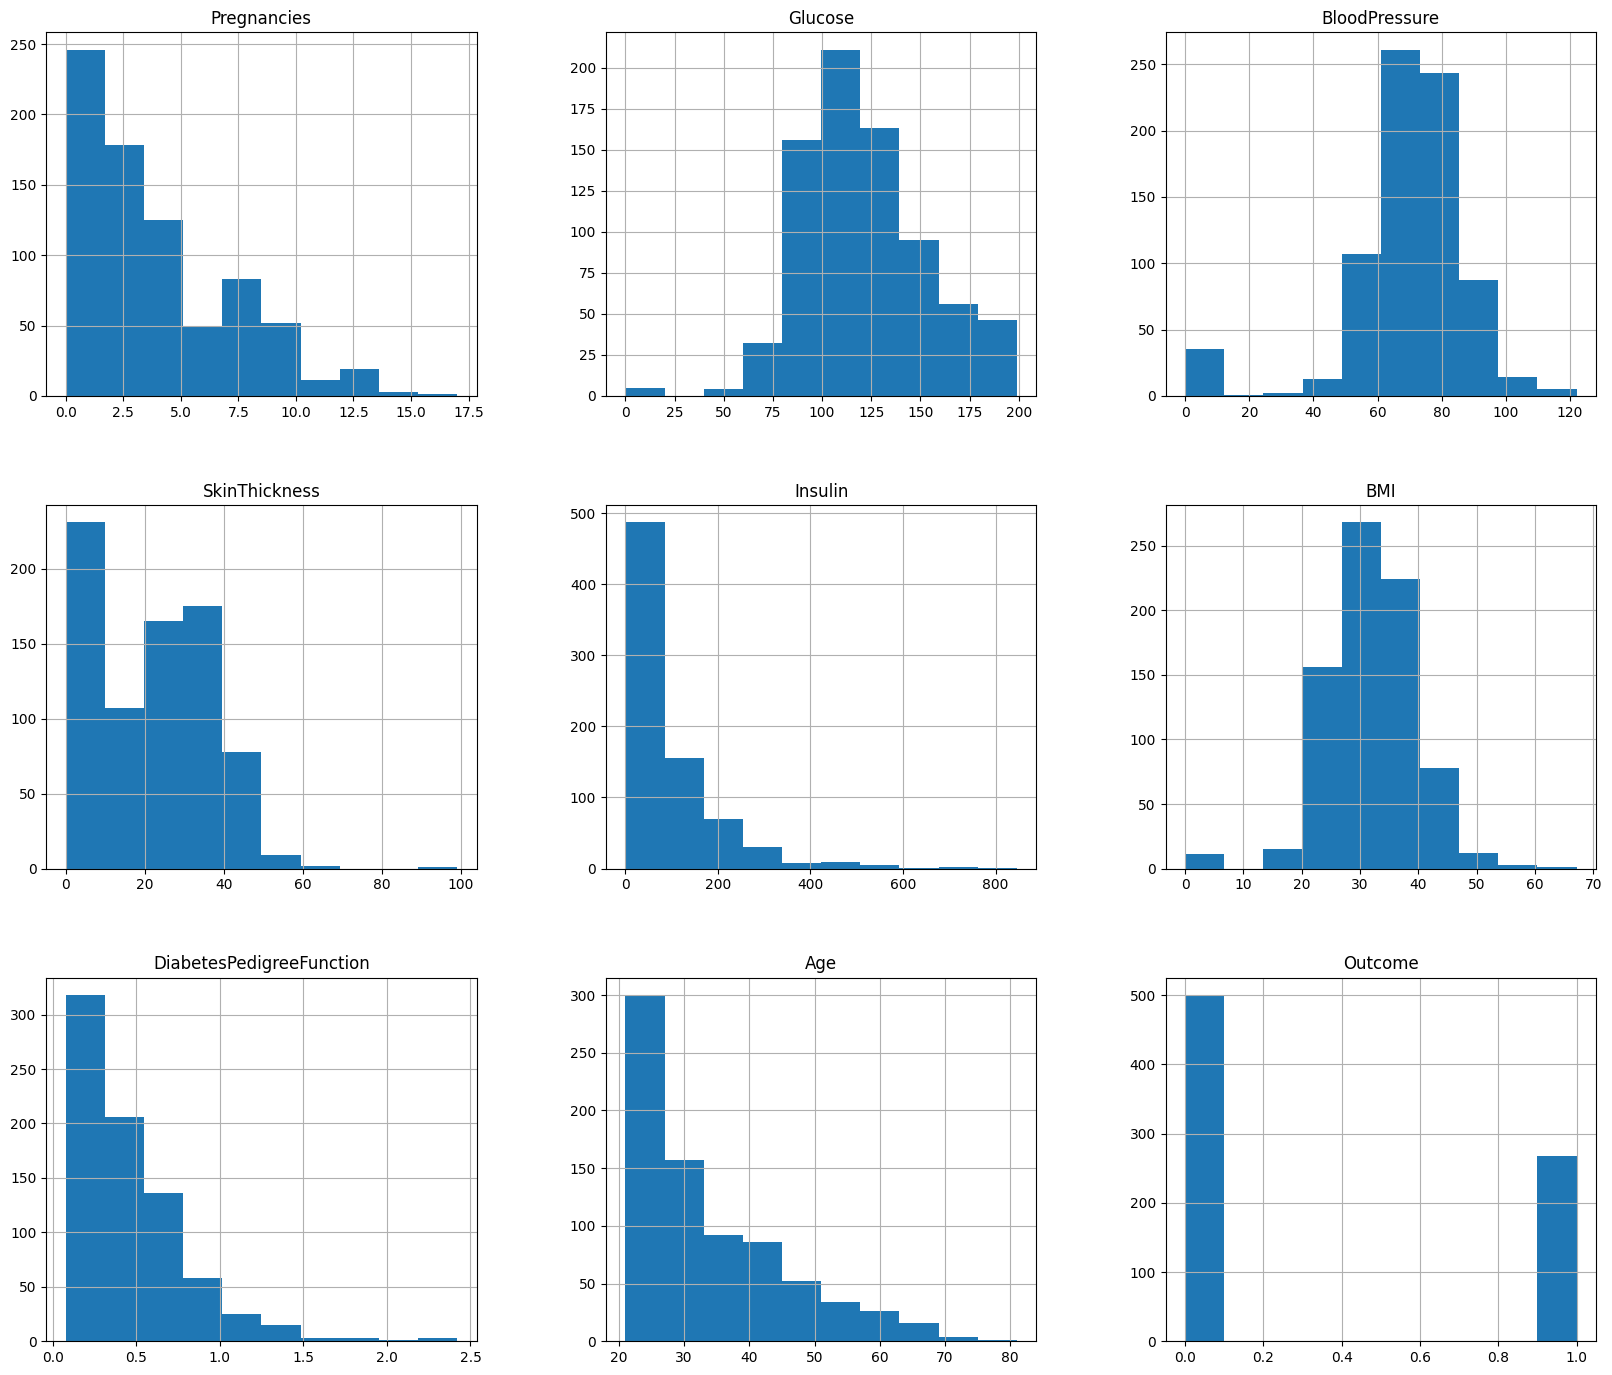

In [113]:
p = df.hist(figsize = (20,17))

we will be imputing the mean value of the column to each missing value of that particular column.

In [114]:
new_df_copy['Glucose'].fillna(new_df_copy['Glucose'].mean(), inplace = True) 
new_df_copy['BloodPressure'].fillna(new_df_copy['BloodPressure'].mean(), inplace = True) 
new_df_copy['SkinThickness'].fillna(new_df_copy['SkinThickness'].median(), inplace = True) 
new_df_copy['Insulin'].fillna(new_df_copy['Insulin'].median(), inplace = True) 
new_df_copy['BMI'].fillna(new_df_copy['BMI'].median(), inplace = True)

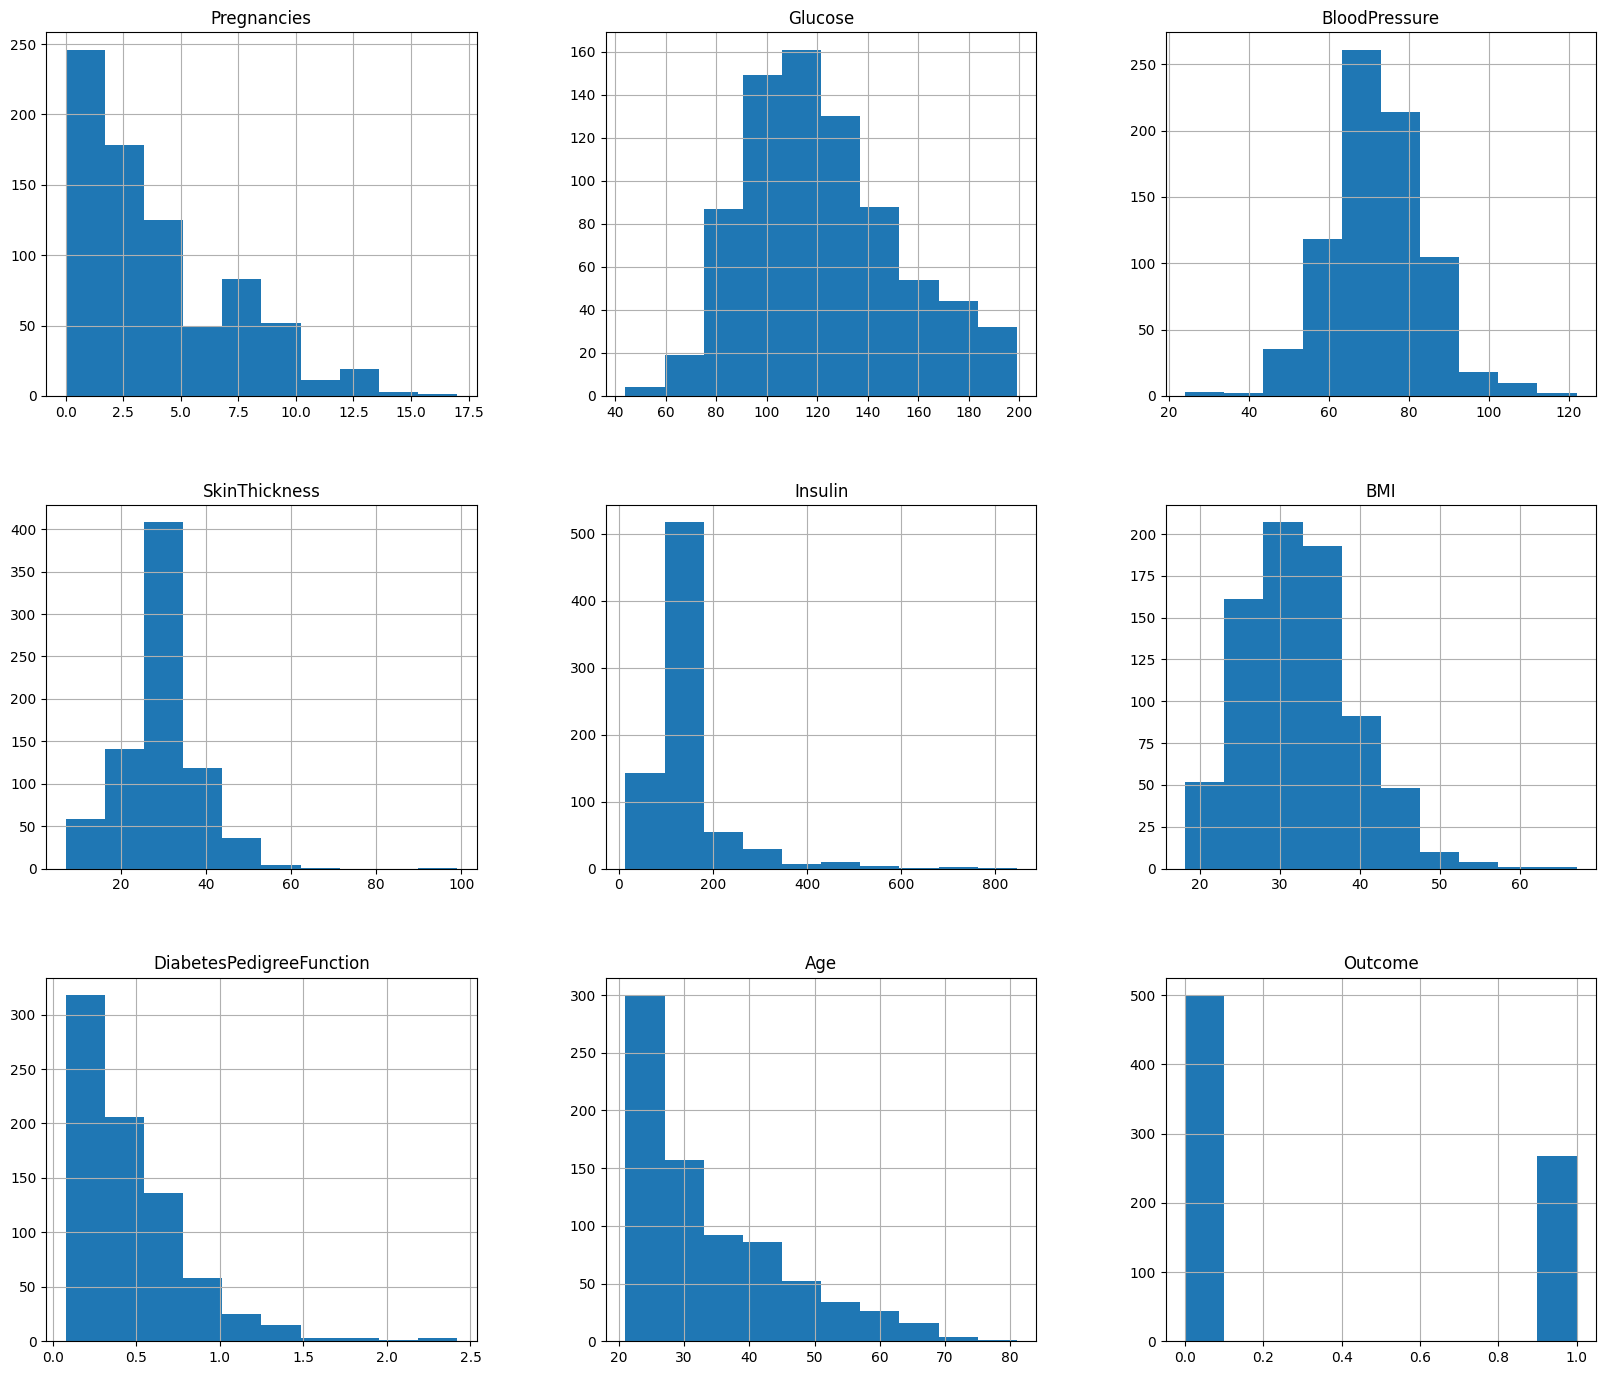

In [115]:
p = new_df_copy.hist(figsize = (20,17))

Here we are again using the hist plot to see the distribution of the dataset but this time we are using this visualization to see the changes that we can see after those null values are removed from the dataset and we can clearly see the difference for example – In age column after removal of the null values, we can see that there is a spike at the range of 50 to 100 which is quite logical as well.

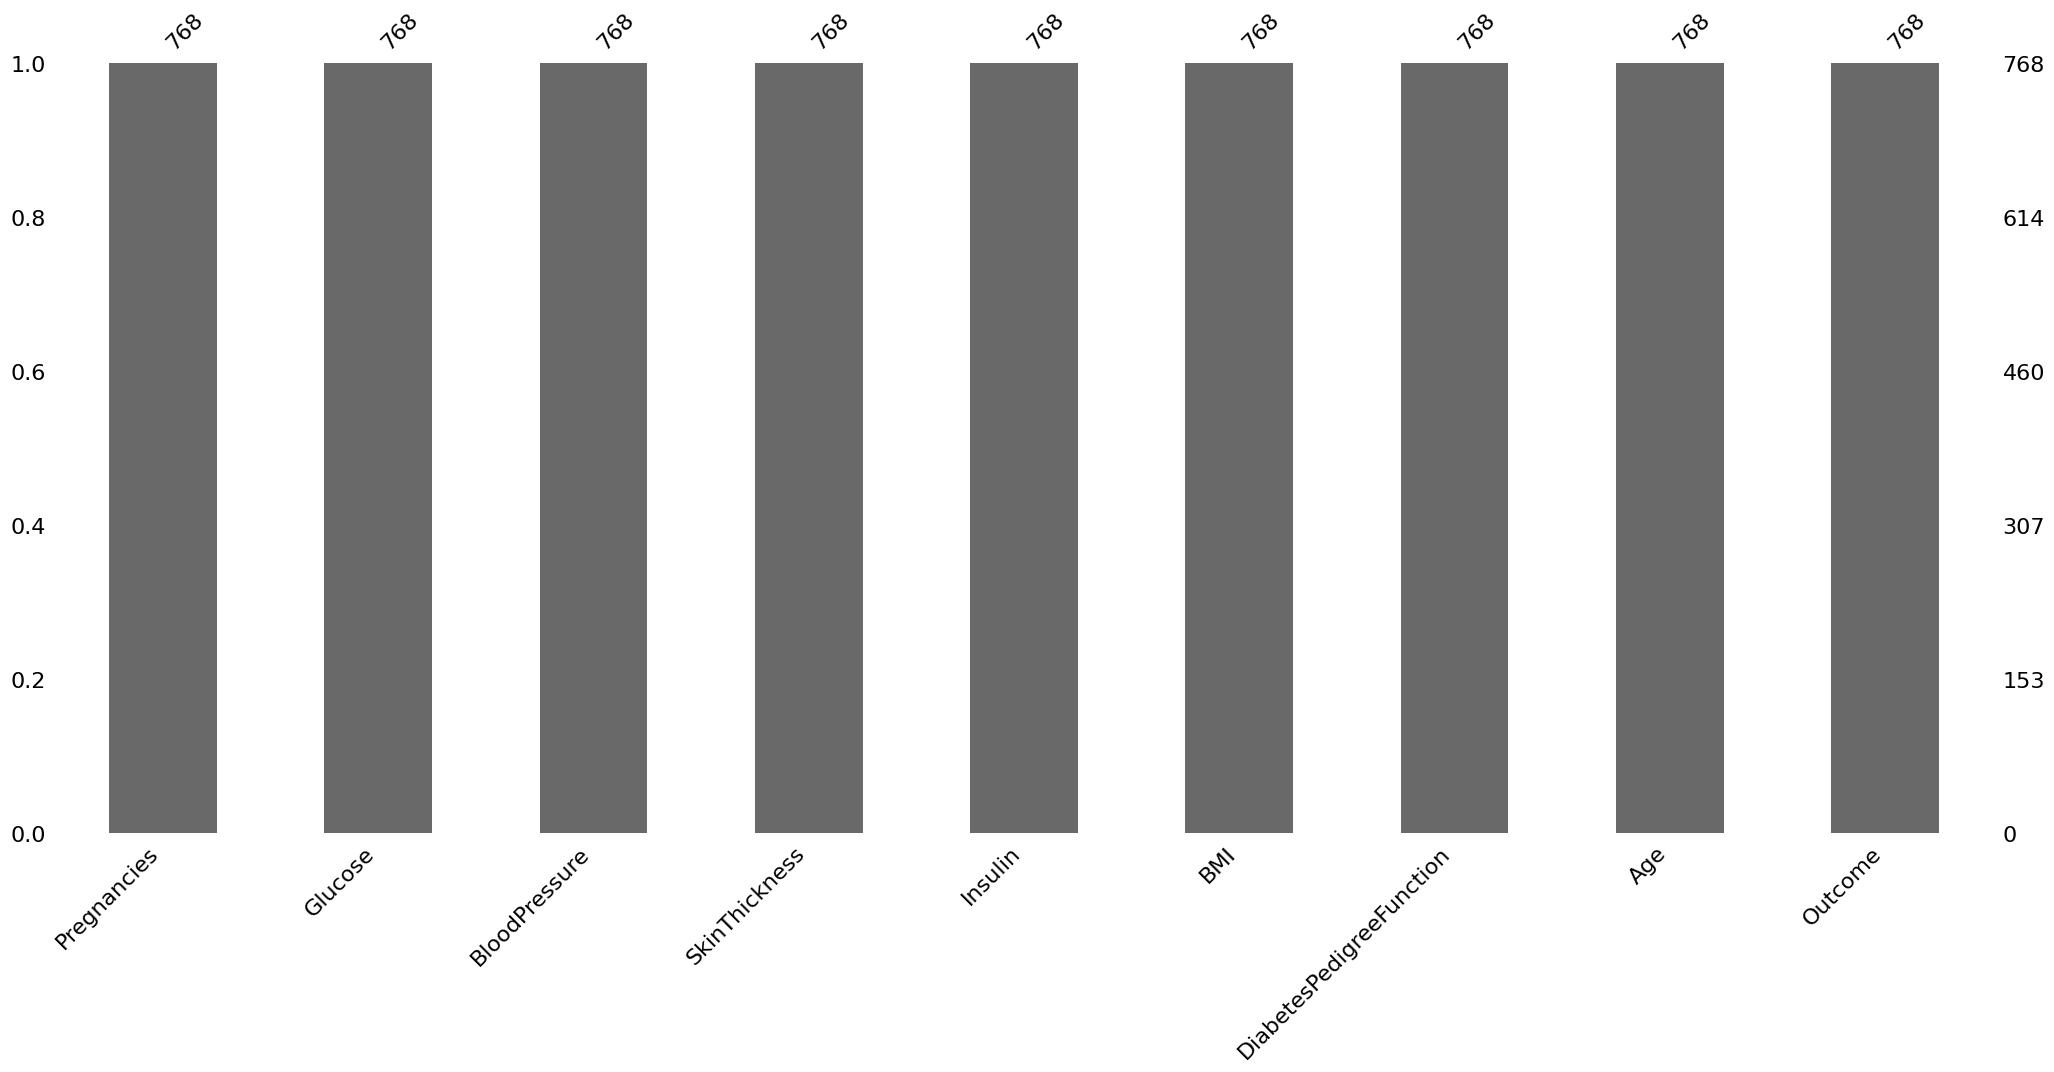

In [116]:
import missingno as msno
p = msno.bar(df)

we can clearly see that there are no null values in the dataset.

## Split the Dataset

In [117]:
from sklearn.model_selection import train_test_split

x=df.drop(['Outcome'],axis=1).values
y=df['Outcome'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=14)
x_train.shape,y_train.shape
x_test.shape,y_test.shape

((192, 8), (192,))

In [118]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

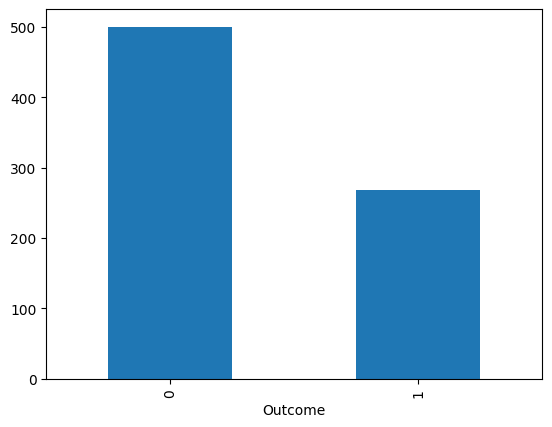

In [119]:
color_wheel = {1: "#0392cf", 2: "#7bc043"} 
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))
p=df.Outcome.value_counts().plot(kind="bar")

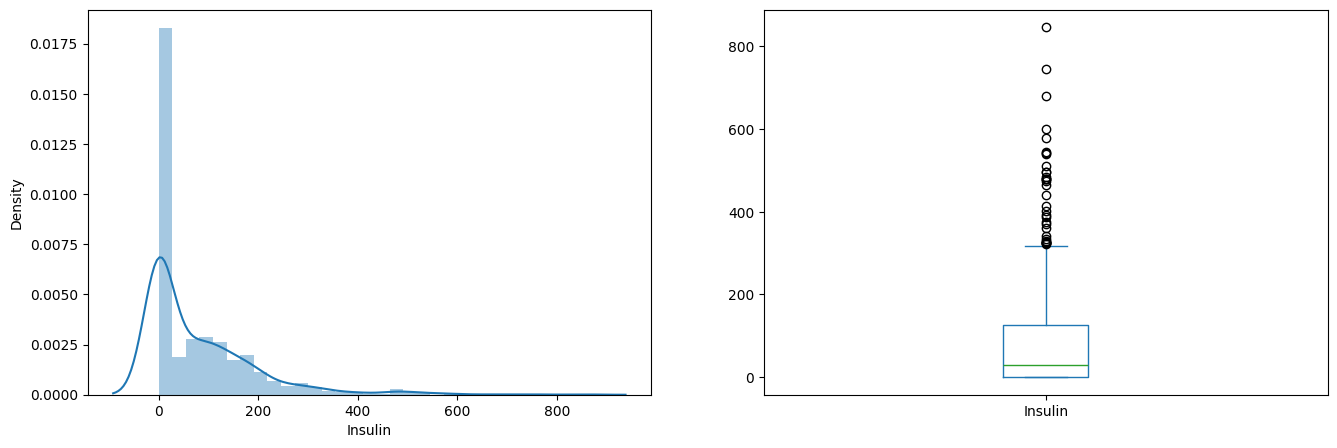

In [120]:
plt.subplot(121), 
sns.distplot(df['Insulin']) 
plt.subplot(122), 
df['Insulin'].plot.box(figsize=(16,5)) 
plt.show()

### Resampling:

In [121]:
from imblearn.under_sampling import NearMiss
from collections import Counter

# initialize a NearMiss for undersampling
ns = NearMiss()

# perform undersampling using NearMiss and obtain the resampled dataset
print("Original dataset shape:", Counter(y_train))
x_train_resampled, y_train_resampled = ns.fit_resample(x_train, y_train)
print("Resample dataset shape:", Counter(y_train_resampled))

Original dataset shape: Counter({0: 371, 1: 205})
Resample dataset shape: Counter({0: 205, 1: 205})


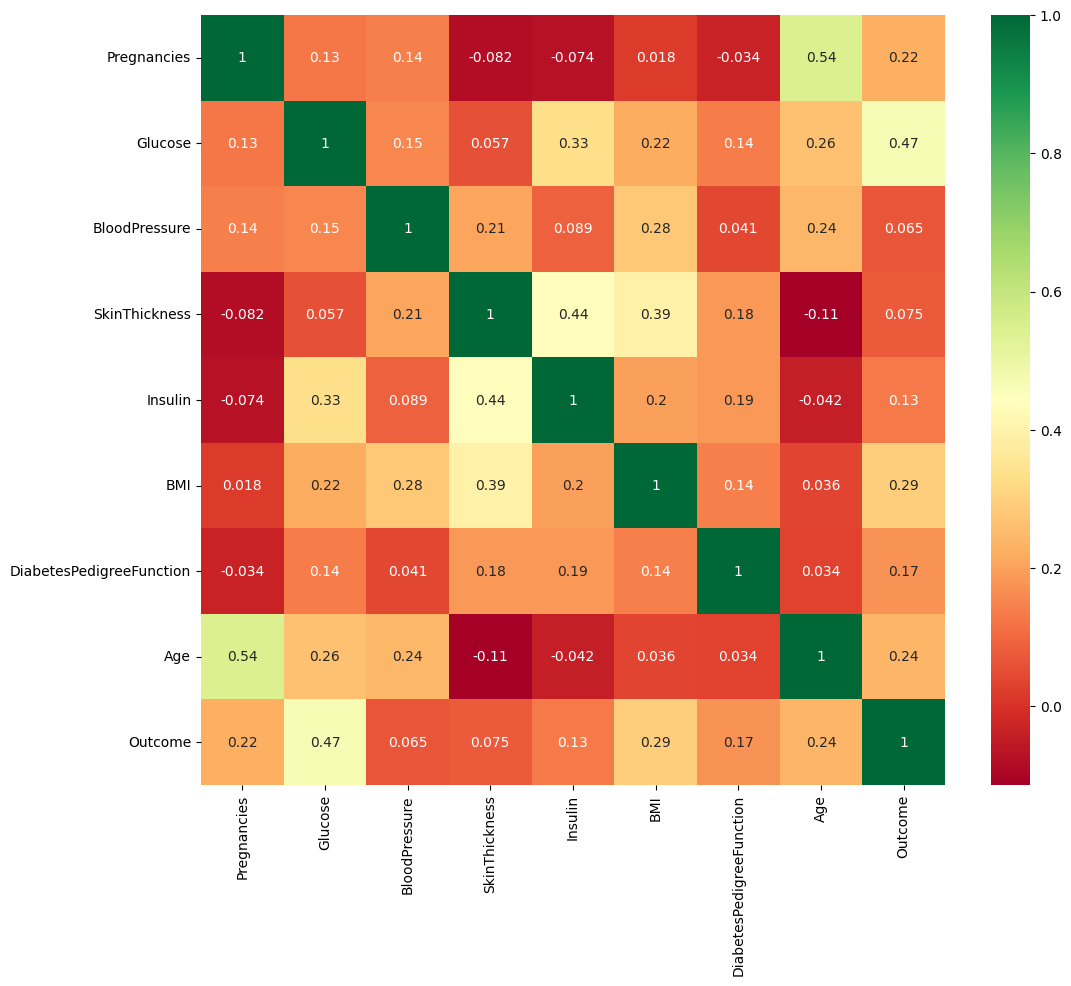

In [122]:
plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

## Scaling

### Before Sampling:

In [123]:
new_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.00,72.00,35.00,125.00,33.60,0.63,50,1
1,1,85.00,66.00,29.00,125.00,26.60,0.35,31,0
2,8,183.00,64.00,29.00,125.00,23.30,0.67,32,1
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1


### After Scaling:

In [124]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler() 
X = pd.DataFrame(sc_X.fit_transform(new_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']) 
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.64,0.87,-0.03,0.67,-0.18,0.17,0.47,1.43
1,-0.84,-1.21,-0.53,-0.01,-0.18,-0.85,-0.37,-0.19
2,1.23,2.02,-0.70,-0.01,-0.18,-1.33,0.60,-0.11
3,-0.84,-1.07,-0.53,-0.70,-0.54,-0.63,-0.92,-1.04
4,-1.14,0.50,-2.68,0.67,0.32,1.55,5.48,-0.02


it is scaled down or we can see every value now is on the same scale which will help our ML model to give a better result.

In [125]:
y = new_df_copy.Outcome 
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Model Building

### Using Lazy Classifier

In [126]:
!pip install lazypredict


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [127]:
from lazypredict.Supervised import LazyClassifier

##### Splitting the data into train and test set with 25-75 split and testing the classification models

In [128]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and predict using LazyClassifier
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the models and their performance
print(models)

  0%|          | 0/29 [00:00<?, ?it/s]

100%|██████████| 29/29 [00:01<00:00, 28.38it/s]

[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

It shows that Bagging Classifier shows the best Accuracy and the ROC AUC as well as the F1 score

In [129]:
def plot_cm(cm, chart):

    # set figure size and title
    plt.figure(figsize=(6, 5))
    plt.suptitle(f'Confusion Matrix of {chart}', y=1)

    # initialize TP, TN, FN, and FP counts
    group_names = ['True Negative', 'False Negative', 'False Positive', 'True Positive']
    group_initial = ['(TN)','(FN)','(FP)','(TP)']
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

    # create label strings with counts and percentages
    labels = [f"{v1}\n{v2}\n\n{v3}" for v1, v2, v3 in zip(group_names, group_initial, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    # plot heatmap of the confusion matrix
    g = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    g.set_xlabel('Actual')
    g.set_ylabel('Predicted')
    
    plt.show()

## Bagging Classifier

In [130]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import numpy as np
from matplotlib import pyplot as plt

# Create a base classifier
base_classifier = DecisionTreeClassifier()

# Initialize the BaggingClassifier with base classifier and 100 estimators
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, n_estimators=100)

# Fit the BaggingClassifier to the training data
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bagging_classifier.predict(X_test)

# Calculate metric evaluation and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print the results
print("="*55)
print("Accuracy     :", accuracy)
print("ROC AUC Score:", roc_auc)
print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)
print("Confusion Matrix:\n\n", cm)
print("="*55)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(2), ['0', '1'])
plt.yticks(np.arange(2), ['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Perform cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
bagging_cv_acc_scores = cross_val_score(bagging_classifier, X_train, y_train, cv=kf, n_jobs=-1, scoring='accuracy').mean()
bagging_cv_rocauc_scores = cross_val_score(bagging_classifier, X_train, y_train, cv=kf, n_jobs=-1, scoring='roc_auc').mean()

# Print the cross-validation results
print(f"The cross-validation accuracy and ROC AUC score for Bagging Classifier after a 10 fold cross-validation:")
print("Accuracy :", bagging_cv_acc_scores)
print("ROC AUC  :", bagging_cv_rocauc_scores)

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

#### Using the GridSearch for hyper-parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a base classifier
base_classifier = DecisionTreeClassifier()

# Initialize the BaggingClassifier
bagging_classifier = BaggingClassifier(base_estimator=base_classifier)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of base estimators
    'base_estimator__max_depth': [None, 5, 10],  # Max depth of the base estimator
    'base_estimator__min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}

# Initialize GridSearchCV for accuracy
grid_search_acc = GridSearchCV(estimator=bagging_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search for accuracy
grid_search_acc.fit(X_train, y_train)

# Get the best parameters and best score for accuracy
best_params_acc = grid_search_acc.best_params_
best_score_acc = grid_search_acc.best_score_

# Print the best parameters and best score for accuracy
print("Best Parameters for Accuracy:", best_params_acc)
print("Best Score for Accuracy:", best_score_acc)

# Initialize GridSearchCV for ROC AUC
grid_search_roc_auc = GridSearchCV(estimator=bagging_classifier, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Perform grid search for ROC AUC
grid_search_roc_auc.fit(X_train, y_train)

# Get the best parameters and best score for ROC AUC
best_params_roc_auc = grid_search_roc_auc.best_params_
best_score_roc_auc = grid_search_roc_auc.best_score_

# Print the best parameters and best score for ROC AUC
print("Best Parameters for ROC AUC:", best_params_roc_auc)
print("Best Score for ROC AUC:", best_score_roc_auc)


Best Parameters for Accuracy: {'base_estimator__max_depth': 5, 'base_estimator__min_samples_split': 10, 'n_estimators': 50}
Best Score for Accuracy: 0.7834199653471945
Best Parameters for ROC AUC: {'base_estimator__max_depth': 5, 'base_estimator__min_samples_split': 10, 'n_estimators': 100}
Best Score for ROC AUC: 0.8452733173372708


##### After the hyper-parameter tuning

Results for Accuracy:
Accuracy     : 0.7337662337662337
ROC AUC Score: 0.7242424242424242
Classification Report:

               precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.61      0.69      0.65        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154

Confusion Matrix:

 [[75 24]
 [17 38]]


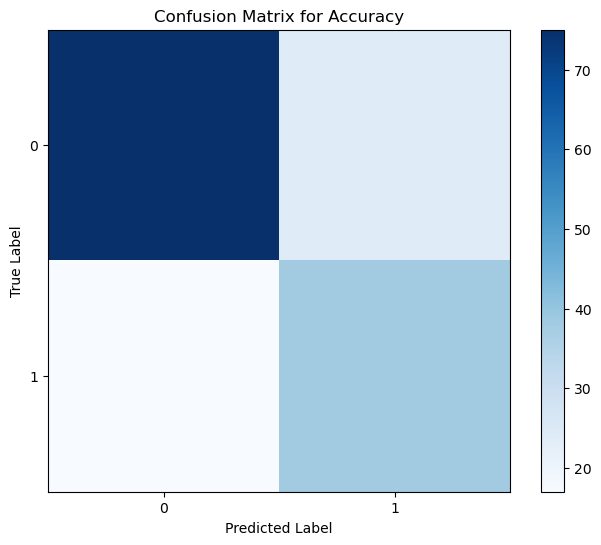

Results for ROC AUC:
Accuracy     : 0.7402597402597403
ROC AUC Score: 0.7212121212121212
Classification Report:

               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

Confusion Matrix:

 [[78 21]
 [19 36]]


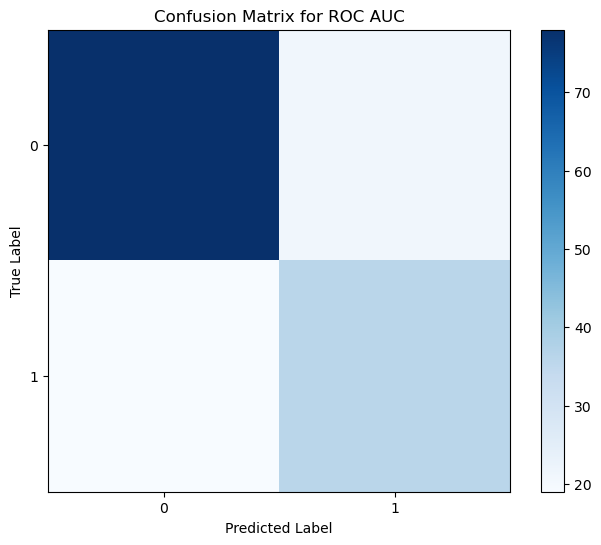

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt

# Create a base classifier with the best parameters
base_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=10)

# Initialize the BaggingClassifier with the best parameters and 50 estimators (for accuracy)
bagging_classifier_acc = BaggingClassifier(base_estimator=base_classifier, n_estimators=50)

# Fit the BaggingClassifier to the training data
bagging_classifier_acc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_acc = bagging_classifier_acc.predict(X_test)

# Calculate metric evaluation and confusion matrix
accuracy_acc = accuracy_score(y_test, y_pred_acc)
roc_auc_acc = roc_auc_score(y_test, y_pred_acc)
cm_acc = confusion_matrix(y_test, y_pred_acc)

# Print the results for accuracy
print("Results for Accuracy:")
print("Accuracy     :", accuracy_acc)
print("ROC AUC Score:", roc_auc_acc)
print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred_acc))
print("="*55)
print("Confusion Matrix:\n\n", cm_acc)
print("="*55)

# Plot the confusion matrix for accuracy
plt.figure(figsize=(8, 6))
plt.imshow(cm_acc, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Accuracy')
plt.colorbar()
plt.xticks(np.arange(2), ['0', '1'])
plt.yticks(np.arange(2), ['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Initialize the BaggingClassifier with the best parameters and 100 estimators (for ROC AUC)
bagging_classifier_roc_auc = BaggingClassifier(base_estimator=base_classifier, n_estimators=100)

# Fit the BaggingClassifier to the training data
bagging_classifier_roc_auc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_roc_auc = bagging_classifier_roc_auc.predict(X_test)

# Calculate metric evaluation and confusion matrix
accuracy_roc_auc = accuracy_score(y_test, y_pred_roc_auc)
roc_auc_roc_auc = roc_auc_score(y_test, y_pred_roc_auc)
cm_roc_auc = confusion_matrix(y_test, y_pred_roc_auc)

# Print the results for ROC AUC
print("Results for ROC AUC:")
print("Accuracy     :", accuracy_roc_auc)
print("ROC AUC Score:", roc_auc_roc_auc)
print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred_roc_auc))
print("="*55)
print("Confusion Matrix:\n\n", cm_roc_auc)
print("="*55)

# Plot the confusion matrix for ROC AUC
plt.figure(figsize=(8, 6))
plt.imshow(cm_roc_auc, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for ROC AUC')
plt.colorbar()
plt.xticks(np.arange(2), ['0', '1'])
plt.yticks(np.arange(2), ['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(n_estimators=100)

In [ ]:
RF_classifier.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier()

In [ ]:
RF_classifier.score(x_train_resampled,y_train_resampled)

1.0

In [ ]:
RF_classifier.score(x_test,y_test)

0.75

In [ ]:
from sklearn.metrics import confusion_matrix
tree_pred=RF_classifier.predict(x_test)

In [ ]:
confusion_matrix(y_test, tree_pred)

array([[99, 30],
       [18, 45]], dtype=int64)

In [ ]:
tree_pred1 = RF_classifier.predict(x_train)

In [ ]:
confusion_matrix(y_train, tree_pred1)

array([[315,  56],
       [  0, 205]], dtype=int64)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report


# initialize the Random Forest classifier and fit it to the resampled training data
RF_classifier = RandomForestClassifier(n_estimators=100)
RF_classifier.fit(x_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = RF_classifier.predict(x_test)

# calculate metric evaluation and confusion matrix
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("="*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Accuracy     : 0.734375
ROC AUC Score: 0.7211148025101514
Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.76      0.79       129
           1       0.58      0.68      0.63        63

    accuracy                           0.73       192
   macro avg       0.71      0.72      0.71       192
weighted avg       0.75      0.73      0.74       192

Confusion Matrix:

 [[98 31]
 [20 43]]


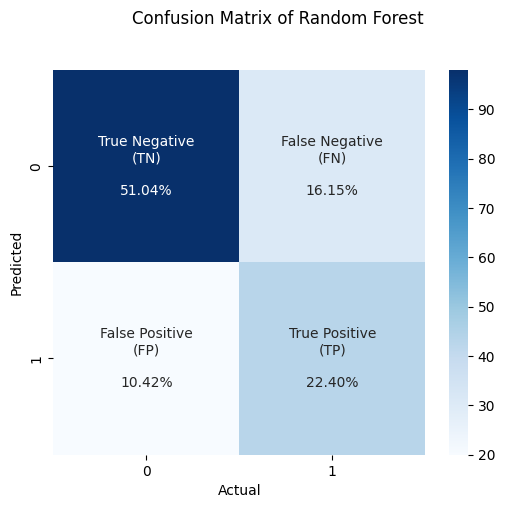

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

chart = 'Random Forest'

# plot the confusion matrix
plot_cm(cm, chart)

#### Cross-Validation:

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Create an instance of the Gaussian Naive Bayes classifier
NB_classifier = GaussianNB()
69

# initialize a K-Fold cross-validation object with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# compute the cross-validation accuracy scores and ROC AUC scores for the untuned NB classifier
nb_before_tuned_cv_acc_scores = cross_val_score(NB_classifier, x_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='accuracy').mean()
nb_before_tuned_cv_rocauc_scores = cross_val_score(NB_classifier, x_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='roc_auc').mean()

# print the cross-validation results
print(f"The cross-validation accuracy and ROC AUC score for untuned {chart} after a 10 fold cross validation:")
print("Accuracy :", nb_before_tuned_cv_acc_scores)
print("ROC AUC  :", nb_before_tuned_cv_rocauc_scores)

The cross-validation accuracy and ROC AUC score for untuned Random Forest after a 10 fold cross validation:
Accuracy : 0.7365853658536585
ROC AUC  : 0.8089294642966403


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 5, 10],
    'bootstrap': [True, False],
}

# initialize GridSearchCV objects for accuracy and ROC AUC score
grid_rf_acc = GridSearchCV(RF_classifier, param_grid, cv=kf, n_jobs=-1, scoring='accuracy')
grid_rf_rocauc = GridSearchCV(RF_classifier, param_grid, cv=kf, n_jobs=-1, scoring='roc_auc')

# perform grid search for accuracy and ROC AUC score
grid_rf_acc.fit(x_train_resampled, y_train_resampled)
grid_rf_rocauc.fit(x_train_resampled, y_train_resampled)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [None, 5, 10],
                         'n_estimators': [100, 150]},
             scoring='roc_auc')

In [ ]:
best_hyperparams_acc = grid_rf_acc.best_params_
best_hyperparams_rocauc = grid_rf_rocauc.best_params_

print("Best hyperparameters for accuracy and ROC AUC:")
print("Accuracy :\n", best_hyperparams_acc)
print("ROC AUC  :\n", best_hyperparams_rocauc)

rf_after_tuned_cv_acc_scores = grid_rf_acc.best_score_
rf_after_tuned_cv_rocauc_scores = grid_rf_rocauc.best_score_

print(f"\nThe cross-validation accuracy and ROC AUC score for tuned {chart} after a 10 fold cross validation:")
print("Accuracy :", rf_after_tuned_cv_acc_scores)
print("ROC AUC  :", rf_after_tuned_cv_rocauc_scores)

best_rf_model = grid_rf_acc.best_estimator_

Best hyperparameters for accuracy and ROC AUC:
Accuracy :
 {'bootstrap': True, 'max_depth': 5, 'n_estimators': 100}
ROC AUC  :
 {'bootstrap': True, 'max_depth': 5, 'n_estimators': 150}

The cross-validation accuracy and ROC AUC score for tuned Random Forest after a 10 fold cross validation:
Accuracy : 0.7365853658536585
ROC AUC  : 0.8204631260104069


In [ ]:
best_rf_fit_for_train_data_acc = cross_val_score(best_rf_model, x_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1).mean()

best_rf_fit_for_train_data_rocauc = cross_val_score(best_rf_model, x_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Train Data")
print("Accuracy :", best_rf_fit_for_train_data_acc)
print("ROC AUC  :", best_rf_fit_for_train_data_rocauc)

best_rf_fit_for_test_data_acc = cross_val_score(best_rf_model, x_test, y_test, 
                                            cv=kf, n_jobs=-1).mean()
best_rf_fit_for_test_data_rocauc = cross_val_score(best_rf_model, x_test, y_test,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Test Data")
print("Accuracy :", best_rf_fit_for_test_data_acc)
print("ROC AUC  :", best_rf_fit_for_test_data_rocauc)

Train Data
Accuracy : 0.7292682926829268
ROC AUC  : 0.8141350905454756
Test Data
Accuracy : 0.7355263157894737
ROC AUC  : 0.8334095904095904


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=14)

In [ ]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=14)

In [ ]:
dt_model.score(x_train,y_train)

1.0

In [ ]:
dt_model.score(x_test,y_test)

0.6822916666666666

In [ ]:
from sklearn.metrics import confusion_matrix
tree_pred=dt_model.predict(x_test)

In [ ]:
confusion_matrix(y_test, tree_pred)

array([[98, 31],
       [30, 33]], dtype=int64)

In [ ]:
tree_pred1 = dt_model.predict(x_train)

In [ ]:
confusion_matrix(y_train, tree_pred1)

array([[371,   0],
       [  0, 205]], dtype=int64)

In [ ]:
# Initialize the Decision Tree classifier and fit it to the resampled training data
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = DT_classifier.predict(x_test)

# Calculate metric evaluation and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print the result
print("="*55)
print("Accuracy     :", accuracy)
print("ROC AUC Score:", roc_auc)
print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)
print("Confusion Matrix:\n\n", cm)
print("="*55)


Accuracy     : 0.5885416666666666
ROC AUC Score: 0.5922849760059061
Classification Report:

               precision    recall  f1-score   support

           0       0.75      0.58      0.66       129
           1       0.41      0.60      0.49        63

    accuracy                           0.59       192
   macro avg       0.58      0.59      0.57       192
weighted avg       0.64      0.59      0.60       192

Confusion Matrix:

 [[75 54]
 [25 38]]


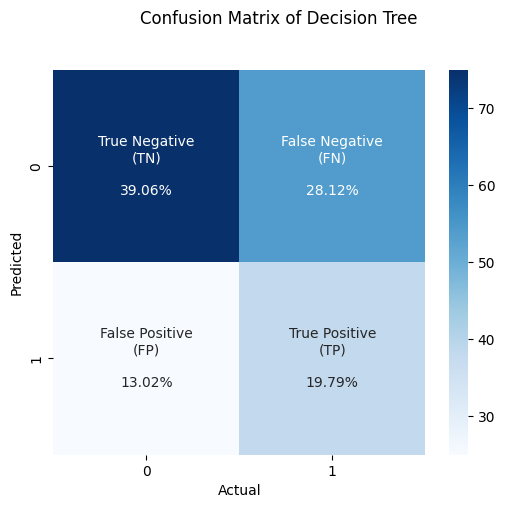

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

chart = 'Decision Tree'

# plot the confusion matrix
plot_cm(cm, chart)

### Improving the Decision Tree model:

In [ ]:
# https://www.analyticsvidhya.com/blog/2021/06/juicing-out-the-diabetes-patterns-amongst-indians-using-machine-learning/ 

In [ ]:
# compute the cross-validation accuracy scores and ROC AUC scores for the untuned RF classifier
dt_before_tuned_cv_acc_scores = cross_val_score(DT_classifier, x_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='accuracy').mean()
dt_before_tuned_cv_rocauc_scores = cross_val_score(DT_classifier, x_train_resampled, y_train_resampled, 
                                            cv=kf, n_jobs=-1, scoring='roc_auc').mean()

# print the cross-validation results
print(f"The cross-validation accuracy and ROC AUC score for untuned {chart} after a 10 fold cross validation:")
print("Accuracy :", dt_before_tuned_cv_acc_scores)
print("ROC AUC  :", dt_before_tuned_cv_rocauc_scores)

The cross-validation accuracy and ROC AUC score for untuned Decision Tree after a 10 fold cross validation:
Accuracy : 0.6414634146341462
ROC AUC  : 0.6336953287902776


In [ ]:
print(DT_classifier.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 5, 10, 20],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],      # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],   # Number of features to consider when looking for the best split
    'random_state': [42],               # Random state for reproducibility
}


# initialize GridSearchCV objects for accuracy and ROC AUC score
grid_dt_acc = GridSearchCV(DT_classifier, param_grid, cv=kf, n_jobs=-1, scoring='accuracy')
grid_dt_rocauc = GridSearchCV(DT_classifier, param_grid, cv=kf, n_jobs=-1, scoring='roc_auc')

# perform grid search for accuracy and ROC AUC score
grid_dt_acc.fit(x_train_resampled, y_train_resampled)
grid_dt_rocauc.fit(x_train_resampled, y_train_resampled)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [42]},
             scoring='roc_auc')

In [ ]:
best_hyperparams_acc = grid_dt_acc.best_params_
best_hyperparams_rocauc = grid_dt_rocauc.best_params_

print("Best hyperparameters for accuracy and ROC AUC:")
print("Accuracy :\n", best_hyperparams_acc)
print("ROC AUC  :\n", best_hyperparams_rocauc)

dt_after_tuned_cv_acc_scores = grid_dt_acc.best_score_
dt_after_tuned_cv_rocauc_scores = grid_dt_rocauc.best_score_

print(f"\nThe cross-validation accuracy and ROC AUC score for tuned {chart} after a 10 fold cross validation:")
print("Accuracy :", dt_after_tuned_cv_acc_scores)
print("ROC AUC  :", dt_after_tuned_cv_rocauc_scores)

best_dt_model = grid_dt_acc.best_estimator_

Best hyperparameters for accuracy and ROC AUC:
Accuracy :
 {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}
ROC AUC  :
 {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 42}

The cross-validation accuracy and ROC AUC score for tuned Decision Tree after a 10 fold cross validation:
Accuracy : 0.6951219512195121
ROC AUC  : 0.7501984018938689


In [ ]:
best_dt_fit_for_train_data_acc = cross_val_score(best_dt_model, x_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1).mean()

best_dt_fit_for_train_data_rocauc = cross_val_score(best_dt_model, x_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Train Data")
print("Accuracy :", best_dt_fit_for_train_data_acc)
print("ROC AUC  :", best_dt_fit_for_train_data_rocauc)

best_dt_fit_for_test_data_acc = cross_val_score(best_dt_model, x_test, y_test, 
                                            cv=kf, n_jobs=-1).mean()
best_dt_fit_for_test_data_rocauc = cross_val_score(best_dt_model, x_test, y_test,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Test Data")
print("Accuracy :", best_dt_fit_for_test_data_acc)
print("ROC AUC  :", best_dt_fit_for_test_data_rocauc)

Train Data
Accuracy : 0.6951219512195121
ROC AUC  : 0.7488883060505251
Test Data
Accuracy : 0.6678947368421053
ROC AUC  : 0.6852458374958376


In [ ]:
dt_model=DecisionTreeClassifier(max_depth=4,max_leaf_nodes=10,random_state=5)
dt_model.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, random_state=5)

In [ ]:
dt_model.score(x_train_resampled,y_train_resampled)

0.7804878048780488

In [ ]:
dt_model.score(x_test,y_test)

0.703125


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


[Text(0.4666666666666667, 0.9, 'x[1] <= 139.5\ngini = 0.458\nsamples = 576\nvalue = [371, 205]'),
 Text(0.2, 0.7, 'x[5] <= 28.15\ngini = 0.355\nsamples = 424\nvalue = [326, 98]'),
 Text(0.13333333333333333, 0.5, 'gini = 0.106\nsamples = 143\nvalue = [135, 8]'),
 Text(0.26666666666666666, 0.5, 'x[7] <= 30.5\ngini = 0.435\nsamples = 281\nvalue = [191, 90]'),
 Text(0.13333333333333333, 0.3, 'x[2] <= 37.0\ngini = 0.32\nsamples = 160\nvalue = [128, 32]'),
 Text(0.06666666666666667, 0.1, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.2, 0.1, 'gini = 0.289\nsamples = 154\nvalue = [127, 27]'),
 Text(0.4, 0.3, 'x[1] <= 106.5\ngini = 0.499\nsamples = 121\nvalue = [63.0, 58.0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.428\nsamples = 58\nvalue = [40, 18]'),
 Text(0.4666666666666667, 0.1, 'gini = 0.464\nsamples = 63\nvalue = [23, 40]'),
 Text(0.7333333333333333, 0.7, 'x[5] <= 29.9\ngini = 0.417\nsamples = 152\nvalue = [45, 107]'),
 Text(0.6, 0.5, 'x[6] <= 0.179\ngini = 0.484\nsamples = 34\

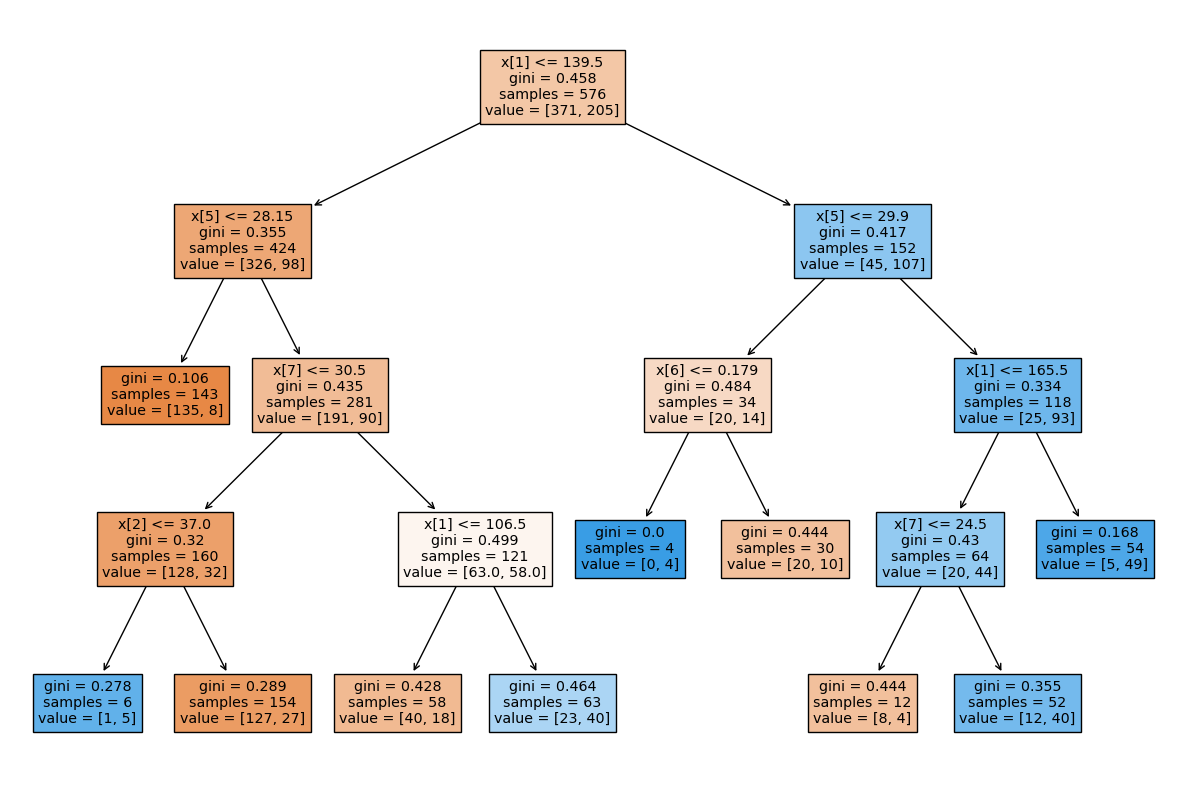

In [ ]:
!pip install graphviz
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_model,filled=True)

In [ ]:
dict_result = {'Model' :['Random Forest', 'Decision Tree'],
                "Accuracy (train)": [best_rf_fit_for_train_data_acc, best_dt_fit_for_train_data_acc],
                "Accuracy (test)": [best_rf_fit_for_test_data_acc, best_dt_fit_for_test_data_acc],
                "ROC-AUC (train)": [best_rf_fit_for_train_data_rocauc, best_dt_fit_for_train_data_rocauc],
                "ROC-AUC (test)": [best_rf_fit_for_test_data_rocauc, best_dt_fit_for_test_data_rocauc]}

model_result = pd.DataFrame(dict_result).sort_values(by=['ROC-AUC (test)', 'Accuracy (test)'], ascending= False).reset_index(drop=True)
model_result


,Model,Accuracy (train),Accuracy (test),ROC-AUC (train),ROC-AUC (test)
0,Random Forest,0.73,0.74,0.81,0.83
1,Decision Tree,0.70,0.67,0.75,0.69


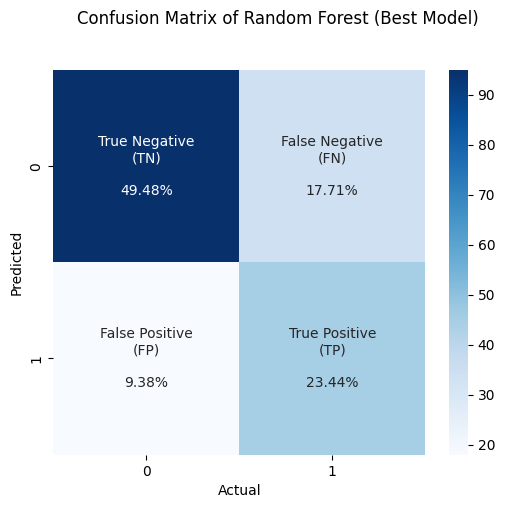

In [ ]:
chart = 'Random Forest (Best Model)'

cm = confusion_matrix(y_test, best_rf_model.predict(x_test))

plot_cm(cm, chart)

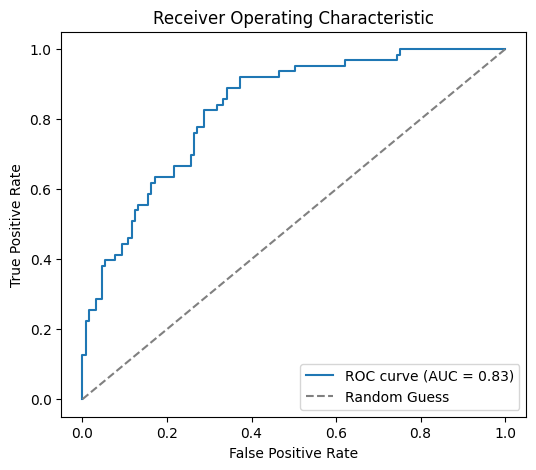

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = best_rf_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
df.shape

(768, 9)

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


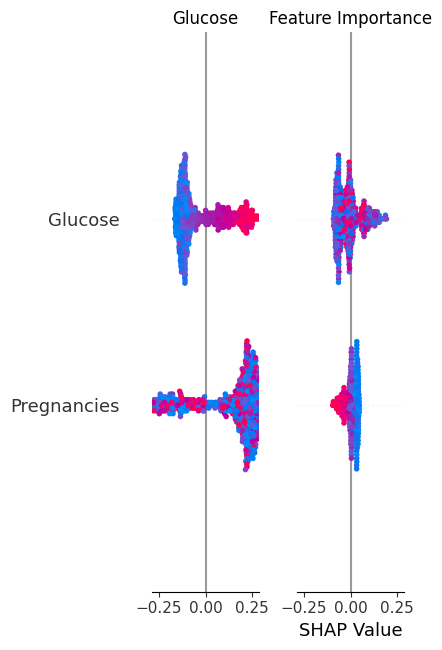

In [ ]:
!pip install shap
import shap

# define an explainer object using the best model, get the importance values, and plot into a bar plot
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type='bar', show=False, cmap='cool')
plt.xlabel('SHAP Value')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
# get the importance values and convert to dataframe
importance = best_rf_model.feature_importances_

feature_importance = pd.DataFrame({'Feature': X.columns, 
                                   'Importance': importance})\
                                    .sort_values(by='Importance', ascending=False)\
                                    .reset_index(drop=True)
feature_importance.head()

,Feature,Importance
0,Glucose,0.31
1,BMI,0.20
2,Age,0.11
3,DiabetesPedigreeFunction,0.10
4,Insulin,0.08
